# Teoria e Prática: Redes Neurais Artificiais (RNA)

# 1) Teorize a relação entre Neurônios Biológicos x Artificiais.
A relação entre neurônios biológicos e neurônios artificiais é fundamentalmente baseada na busca por replicar o funcionamento do cérebro humano em modelos computacionais, especificamente em redes neurais artificiais. Os neurônios biológicos, que são as unidades básicas do sistema nervoso humano, desempenham um papel crucial na transmissão de sinais elétricos e químicos no organismo. Esses sinais permitem que informações sejam processadas e transmitidas pelo cérebro.

Os neurônios artificiais são projetados com inspiração nos neurônios biológicos, embora de forma simplificada, para que possam ser implementados em modelos de computador. Esses elementos computacionais são concebidos para imitar o comportamento dos neurônios biológicos no processamento de informações. Eles tipicamente empregam funções de ativação que determinam suas saídas com base nas entradas recebidas e em um limite de ativação. Assim, a saída do neurônio artificial é direcionada para outros neurônios na rede, possibilitando a propagação do sinal ao longo da rede neural.

Embora os neurônios artificiais simplifiquem o funcionamento dos neurônios biológicos, a relação fundamental entre eles reside na tentativa de emular a forma como os neurônios biológicos processam informações e se comunicam entre si. Ambos os tipos de neurônios desempenham um papel importante no processamento de informações e podem ser empregados em uma ampla gama de tarefas, incluindo classificação, reconhecimento de padrões e tomada de decisões. Essa relação é central na área de aprendizado de máquina e inteligência artificial, onde as redes neurais artificiais são usadas para abordar problemas complexos e realizar tarefas que de alguma forma se assemelham ao processamento de informações no cérebro humano.

o Perceptron é uma das mais simples arquiteturas RNA, ela é baseada em um neurônio artificial ligeiramente diferente chamado de LTU. Uma única LTU pode ser utilizada para classificação binária linear simples. Ela calcula uma combinação linear das entradas e, se o resultado exceder um limiar, exibe a classe positiva ou então negativa (como um classificador de Regressão Logística ou um SVM linear). Por exemplo, com base no comprimento e largura da pétala, poderia utilizar
uma única LTU para classificar as flores da íris (adicionando também uma característica extra de viés x0 = 1).

In [40]:

import numpy as np  # Importa a biblioteca NumPy para manipulação de arrays

from sklearn.datasets import load_iris  # Importa a função para carregar o conjunto de dados Iris
from sklearn.linear_model import Perceptron  # Importa o classificador Perceptron do Scikit-Learn

# Carrega o conjunto de dados Iris com a opção as_frame=True para obter um DataFrame do Pandas
iris = load_iris(as_frame=True)

# Seleciona as duas features ("petal length (cm)" e "petal width (cm)") do conjunto de dados Iris
X = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Cria as labels/targets definindo se a classe é "Iris setosa" (0 se for, 1 se não for)
y = (iris.target == 0)  # Iris setosa

# Inicializa o classificador Perceptron com um gerador de números aleatórios definido pelo 'random_state'
per_clf = Perceptron(random_state=42)

# Treina o classificador Perceptron com os dados de entrada 'X' e as labels 'y'
per_clf.fit(X, y)

# Define novos exemplos 'X_new' que se deseja classificar
X_new = [[2, 0.5], [3, 1]]

# Realiza a previsão das classes dos novos exemplos usando o classificador treinado
y_pred = per_clf.predict(X_new)



O Scikit-Learn fornece uma classe Perceptron que implementa uma rede LTU simples, ele pode ser utilizado praticamente como  no conjunto de dados de Iris. 

In [42]:
# Realiza a previsão das classes dos novos exemplos usando o classificador treinado
y_pred 

array([ True, False])

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()



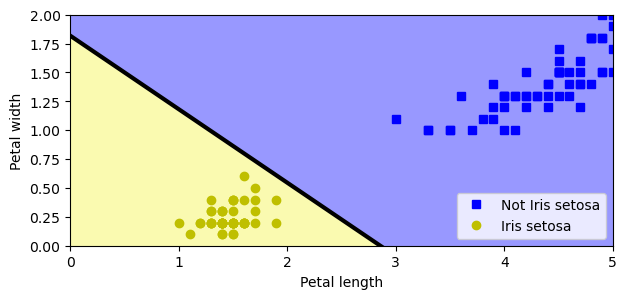

In [49]:
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para geração de gráficos
from matplotlib.colors import ListedColormap  # Importa um mapa de cores personalizado

# Calcula os coeficientes da reta que representa a fronteira de decisão do Perceptron
a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]

# Define os limites do gráfico
axes = [0, 5, 0, 2]

# Cria uma grade de pontos de entrada (features) para a visualização
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

# Faz previsões para os pontos de entrada usando o Perceptron treinado
y_predict = per_clf.predict(X_new)

# Reorganiza as previsões em uma grade
zz = y_predict.reshape(x0.shape)

# Define um mapa de cores personalizado
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# Cria uma figura para a visualização
plt.figure(figsize=(7, 3))

# Plota os pontos de dados no gráfico (azuis para não Iris setosa e amarelos para Iris setosa)
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")

# Plota a reta que representa a fronteira de decisão (linha preta)
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

# Preenche a área separada pela fronteira de decisão com as cores do mapa de cores
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# Adiciona rótulos aos eixos
plt.xlabel("Petal length")
plt.ylabel("Petal width")

# Adiciona uma legenda ao gráfico
plt.legend(loc="lower right")

# Define os limites do gráfico
plt.axis(axes)

# Exibe o gráfico
plt.show()



Esse gráfico representa a fronteira de decisão do Perceptron treinado no conjunto de dados Iris. O gráfico mostra os pontos de dados como pontos azuis (representando "Not Iris setosa") e pontos amarelos (representando "Iris setosa"), a fronteira de decisão como uma linha preta e a área separada pela fronteira de decisão é preenchida com cores do mapa de cores personalizado. O gráfico ajuda a visualizar como o Perceptron divide as classes no espaço de características das flores Iris.

# 2) Como funciona, em teoria, uma RNA Perceptron? Explique, inclusive sobre as multicamadas da rede e o que é "Retropropagação"?

Uma Rede Neural Artificial (RNA) Perceptron é um tipo básico de rede neural que consiste em um único neurônio artificial. O Perceptron é uma unidade de processamento que recebe um conjunto de entradas ponderadas, aplica uma função de ativação e produz uma saída.

Para entender o seu funcionamento, é útil dividir o processo em etapas. Primeiro, as entradas são ponderadas, multiplicadas pelos pesos correspondentes, que representam a importância relativa das diferentes entradas para o neurônio. Em seguida, os valores ponderados das entradas são somados para criar uma ativação bruta ou potencial de ativação. Esta ativação é então processada por uma função de ativação não linear que determina como o neurônio responde ao valor de ativação. A saída final do Perceptron é determinada pela função de ativação, que pode ser uma função degrau, uma função sigmoide, uma função ReLU ou outra função não linear, dependendo do tipo de problema.

 Embora uma RNA Perceptron seja limitada a resolver problemas de classificação linearmente separáveis, as redes neurais multicamadas, conhecidas como redes feedforward, expandem essa capacidade, permitindo que a rede modele relacionamentos mais complexos e resolva problemas de classificação e regressão mais desafiadores. Por meio do ajuste dos pesos durante o treinamento, essas redes podem aprender a representar dados em espaços mais complexos, tornando-as poderosas ferramentas para uma variedade de tarefas de aprendizado de máquina.



# 2.1 o que é "Retropropagação"?
Uma rede neural multicamada é composta por uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Os neurônios em cada camada estão conectados a neurônios nas camadas adjacentes, formando uma estrutura de rede. As camadas ocultas permitem que a rede aprenda representações hierárquicas e não lineares dos dados de entrada, tornando-a capaz de resolver problemas mais complexos.

A retropropagação (backpropagation) é um algoritmo utilizado para treinar redes neurais multicamadas. Ele permite que a rede aprenda a ajustar os pesos das conexões entre os neurônios, de forma a minimizar a diferença entre as saídas previstas e os valores reais. O processo de retropropagação envolve a propagação do erro da saída da rede de volta para as camadas ocultas, ajustando iterativamente os pesos com base no gradiente do erro.

A retropropagação utiliza o gradiente descendente para atualizar os pesos da rede, com o objetivo de encontrar um mínimo global na função de custo. Esse processo de otimização iterativa permite que a rede neural ajuste seus parâmetros para melhor se adaptar aos dados de treinamento e realizar previsões precisas em dados não vistos.

In [62]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Carrega o conjunto de dados California housing
housing = fetch_california_housing()
# Divide os dados em conjuntos de treinamento (treino e validação) e teste
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)
# Inicializa um regressor de rede neural MLP com 3 camadas ocultas, cada uma com 50 neurônios
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
# Calcula a raiz quadrada do erro médio quadrático (RMSE) entre as previsões e os valores reais de validação
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [63]:
# Calcula a raiz quadrada do erro médio quadrático (RMSE) entre as previsões e os valores reais de validação
rmse 

0.5053326657968523

# 3-Discuta em detalhes o exemplo "MLPs with Keras" (Perceptron Multicamadas com Keras TensorFlow), para treinamento e classificação de imagens padronizadas MNIST de classes de roupas e calçados. Mostre como é feito o treinamento e testes a fim de avaliar a acurácia de ambos (treinamento e de classificação de dados não aplicados no treinamento).

O exemplo "MLPs with Keras" (Perceptron Multicamadas com Keras TensorFlow) demonstra o treinamento e a classificação de imagens padronizadas do conjunto de dados MNIST, que consiste em imagens de roupas e calçados divididas em 10 classes.
Primeiramente, o exemplo importa as bibliotecas necessárias, incluindo o TensorFlow e o Keras. Em seguida, o conjunto de dados MNIST é carregado e dividido em conjuntos de treinamento e teste. As imagens são normalizadas para que os valores dos pixels fiquem entre 0 e 1, facilitando o treinamento da rede neural.

Em seguida, é construída uma rede neural multicamadas utilizando a API do Keras. Essa rede possui uma camada de entrada com 784 neurônios, correspondendo aos 28x28 pixels das imagens de entrada. Há duas camadas ocultas com 64 neurônios cada, seguidas por uma camada de saída com 10 neurônios, correspondendo às 10 classes do conjunto de dados.

In [65]:
import tensorflow as tf  # Importa a biblioteca TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
# Desempacota os dados carregados do Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
# Divide os dados de treinamento em treinamento e validação
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [66]:
60000*28*28

47040000

In [67]:
# Obtém o tamanho (número de elementos) do conjunto de dados de treinamento completo (X_train_full)
size_of_X_train_full = X_train_full.size


In [68]:
X_train.size

43120000

In [69]:
y_train.size/47040000

0.00116921768707483

In [70]:
X_valid.size/47040000

0.08333333333333333

In [71]:
y_valid.size/47040000

0.00010629251700680272

In [72]:
# Verifica a forma dos dados de treinamento
X_train.shape

(55000, 28, 28)

In [73]:
# Verifica o tipo de dado dos pixels
X_train.dtype

dtype('uint8')

In [74]:
# Normaliza os valores dos pixels dividindo por 255
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [75]:
# Verifica os rótulos das classes de treinamento
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [76]:
# Lista de nomes das classes, nas figuras
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [77]:
class_names[y_train[0]]

'Ankle boot'

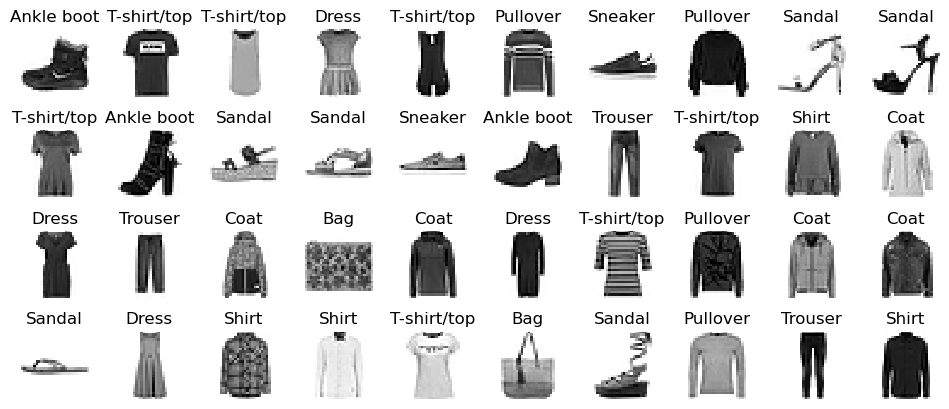

In [78]:

import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib

# Exibe uma grade de amostras de imagens de cada classe
n_rows = 4
n_cols = 10

# Cria uma figura para mostrar as amostras
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# Loop para preencher a grade com amostras de imagens
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)  # Seleciona a célula na grade
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")  # Exibe a imagem
        plt.axis('off')  # Remove os eixos
        plt.title(class_names[y_train[index]])  # Adiciona o rótulo da classe

# Ajusta o espaçamento entre as células na grade
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Exibe a figura com a grade de amostras de imagens
plt.show()

# (Opcional) Salva a figura em um arquivo
# plt.savefig("fashion_mnist_plot.png")  # Exemplo de como salvar a figura


Define o número de linhas (n_rows) e colunas (n_cols) para a grade de imagens. No caso, a grade terá 4 linhas e 10 colunas.
Cria após uma figura de tamanho apropriado para acomodar a grade de amostras de imagens, usa um loop aninhado para preencher a grade com amostras de imagens. Cada amostra é selecionada a partir dos dados de treinamento (X_train) e exibida na célula correspondente na grade. Remove os eixos nas células para tornar a visualização mais limpa e adiciona o rótulo da classe (categoria) da amostra como título em cada célula.


In [79]:
import tensorflow as tf

# Essa biblioteca contem 60000 ecalas graficas em 28x28 pixels.
# Carrega o conjunto de dados Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
# Divide os dados de treinamento em treinamento e validação
X_train, y_train = X_train_full[:-12000], y_train_full[:-12000]
X_valid, y_valid = X_train_full[-12000:], y_train_full[-12000:]

In [80]:
X_train.shape

(48000, 28, 28)

In [81]:
# Obtém e exibe a forma do conjunto de validação X_valid
print(X_valid.shape)


(12000, 28, 28)


In [82]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

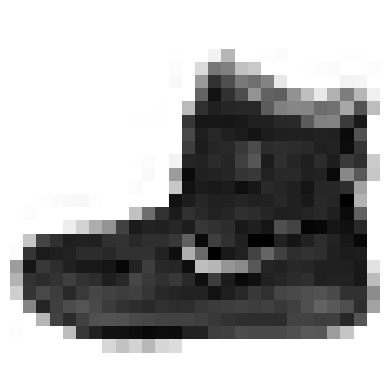

In [83]:

import matplotlib.pyplot as plt

# Exibe uma imagem de exemplo do conjunto de treinamento
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [84]:
y_train

array([9, 0, 0, ..., 6, 7, 0], dtype=uint8)

In [85]:
# Define uma semente (seed) para garantir a reprodutibilidade dos resultados
tf.random.set_seed(42)

# Cria um modelo sequencial (feedforward)
model = tf.keras.Sequential()

# Adiciona uma camada de entrada com a forma (shape) das imagens (28x28 pixels)
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))

# Achatamento das imagens para um vetor unidimensional
model.add(tf.keras.layers.Flatten())

# Adiciona uma camada densa (fully connected) com 300 neurônios e função de ativação ReLU
model.add(tf.keras.layers.Dense(300, activation="relu"))

# Adiciona outra camada densa com 100 neurônios e função de ativação ReLU
model.add(tf.keras.layers.Dense(100, activation="relu"))

# Adiciona a camada de saída com 10 neurônios (um para cada classe) e função de ativação softmax
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [86]:

# Limpa sessões anteriores e configura uma semente (seed) para garantir a reprodutibilidade dos resultados
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# Cria um modelo sequencial usando a sintaxe simplificada
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),  # Camada de achatamento para converter imagens 28x28 em vetor unidimensional
    tf.keras.layers.Dense(300, activation="relu"),  # Camada densa com 300 neurônios e função de ativação ReLU
    tf.keras.layers.Dense(100, activation="relu"),  # Camada densa com 100 neurônios e função de ativação ReLU
    tf.keras.layers.Dense(10, activation="softmax")  # Camada de saída com 10 neurônios (classes) e função de ativação softmax
])


In [87]:
# Exibe um resumo da arquitetura do modelo
model.summary()

# O resultado desse comando mostrará informações sobre as camadas do modelo,
# incluindo o tipo de camada, o número de parâmetros treináveis, e o formato
# dos dados em cada camada. Isso é útil para visualizar a estrutura do modelo
# e verificar se ele foi construído corretamente.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
# Configuração da compilação do modelo
model.compile(
    loss="sparse_categorical_crossentropy",  # Função de perda para calcular o erro
    optimizer="sgd",  # Otimizador para ajustar os pesos do modelo durante o treinamento
    metrics=["accuracy"]  # Métrica a ser monitorada durante o treinamento (precisão no caso de classificação)
)

# Esta chamada configura o modelo para o treinamento:
# - "loss" especifica a função de perda a ser usada para calcular o erro entre as previsões do modelo e os rótulos reais.
# - "optimizer" define o algoritmo de otimização usado para ajustar os pesos do modelo com base no erro.
# - "metrics" especifica as métricas que você deseja acompanhar durante o treinamento, neste caso, a precisão.


In [89]:

# Configuração da compilação do modelo
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,  # Função de perda para calcular o erro
    optimizer=tf.keras.optimizers.SGD(),  # Otimizador para ajustar os pesos do modelo durante o treinamento
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]  # Métrica a ser monitorada durante o treinamento
)



In [90]:
# Converte um vetor de rótulos em codificação one-hot
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)



array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)